In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [79]:
Data = "C:/Users/Nikhil/Downloads/Bengaluru_House_Data.csv"
DF1 = pd.read_csv(Data)
DF1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [80]:
DF1.shape

(13320, 9)

In [81]:
DF1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [82]:
DF1.drop(['area_type','availability','society','balcony'],axis='columns',inplace = True)

In [83]:
DF1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [84]:
DF1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [85]:
DF1.dropna(inplace=True)

In [86]:
DF1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [87]:
DF1.shape

(13246, 5)

In [88]:
DF1['BHK'] = DF1['size'].apply(lambda x: int(x.split(' ')[0]))

In [89]:
DF1

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [90]:
DF1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [91]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [92]:
DF1[~DF1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [93]:
def convert(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [94]:
DF2 = DF1.copy()
DF2['total_sqft']=DF2['total_sqft'].apply(convert)
DF2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [95]:
DF2['Price_per_sqft'] = DF2['price']*100000/DF2['total_sqft']
DF2

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [96]:

DF2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [97]:
DF2.location=DF2.location.apply(lambda x: x.strip())

In [98]:
location_stats = DF2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [99]:
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [100]:
len(location_stats[location_stats<=10])

1052

In [101]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [102]:
DF2.location = DF2.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [103]:
len(DF2.location.unique())

242

In [104]:
DF2

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [105]:
DF3 = DF2[~(DF2.total_sqft/DF2.BHK<300)]
DF3.shape

(12502, 7)

In [106]:
DF3.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [107]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

In [108]:
DF4 = remove_pps_outliers(DF3)
DF4.shape

(10241, 7)

In [109]:
DF4

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [110]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location)&(df.BHK==2)]
    BHK3 = df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color = 'blue',label = '2 BHK', s = 30)
    plt.scatter(BHK3.total_sqft,BHK3.price,color = 'black',label = '3 BHK', s = 30)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

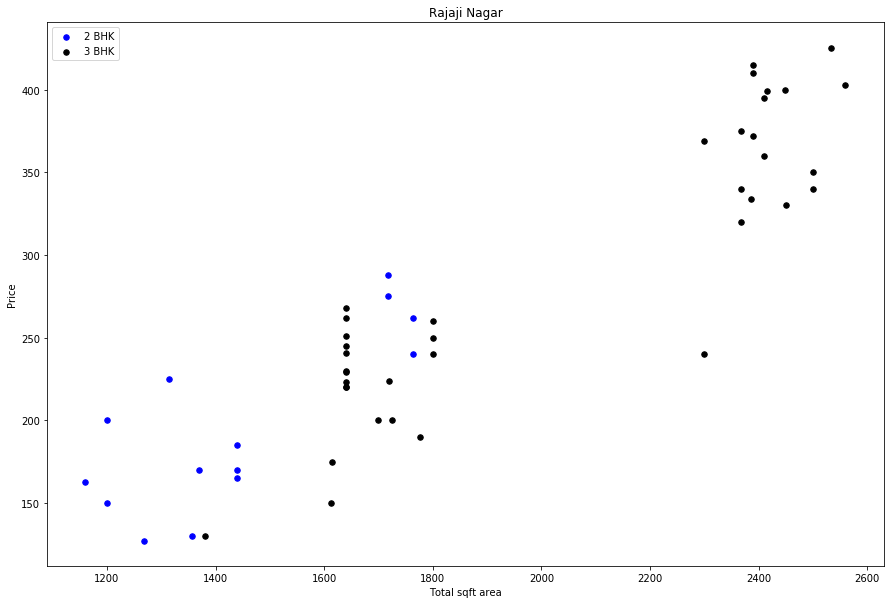

In [111]:
plot_scatter_chart(DF4,'Rajaji Nagar')

In [112]:
def remove_bhk_outliers(df):
    exclusive_id = np.array([])
    for location,location_df in df.groupby('location'):
        BHK_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            BHK_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_sqft),
                'std' : np.std(bhk_df.Price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclusive_id = np.append(exclusive_id, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclusive_id,axis = 'index')

In [113]:
DF5 = remove_bhk_outliers(DF4)
DF5.shape


(7329, 7)

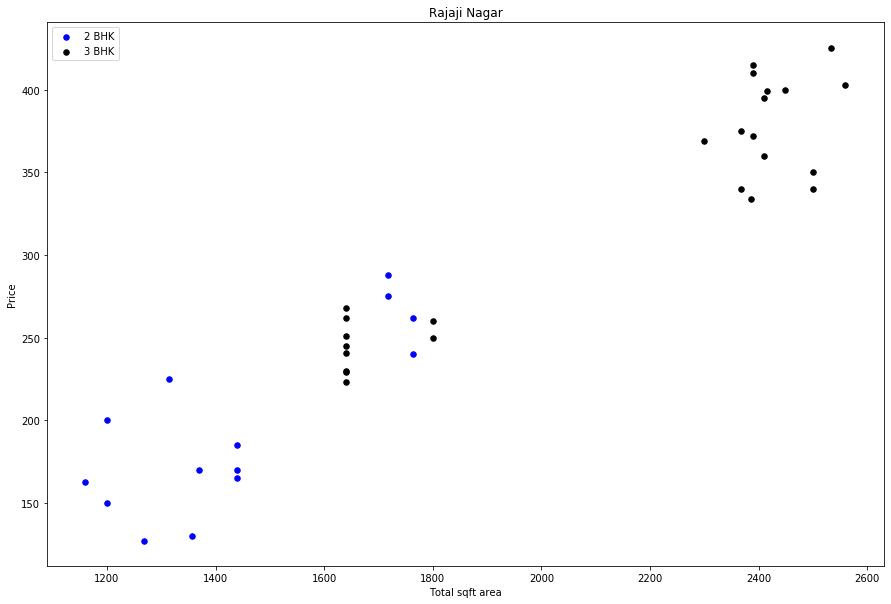

In [114]:
plot_scatter_chart(DF5,'Rajaji Nagar')

Text(0, 0.5, 'count')

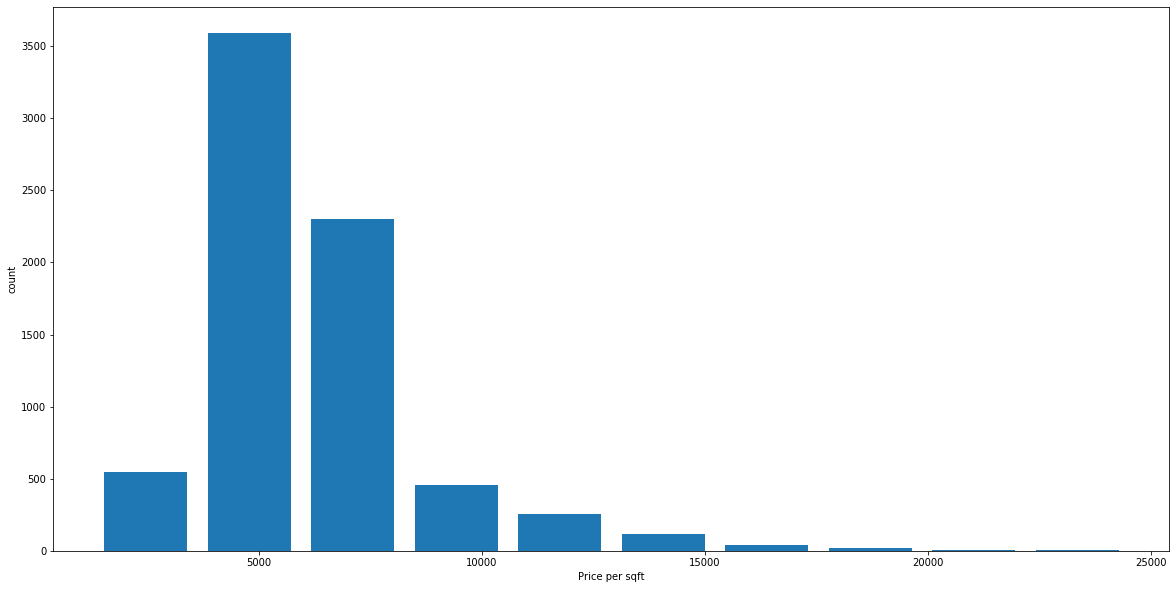

In [115]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(DF5.Price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per sqft")
plt.ylabel("count")

In [116]:
DF5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [117]:
DF5[DF5.bath>10]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

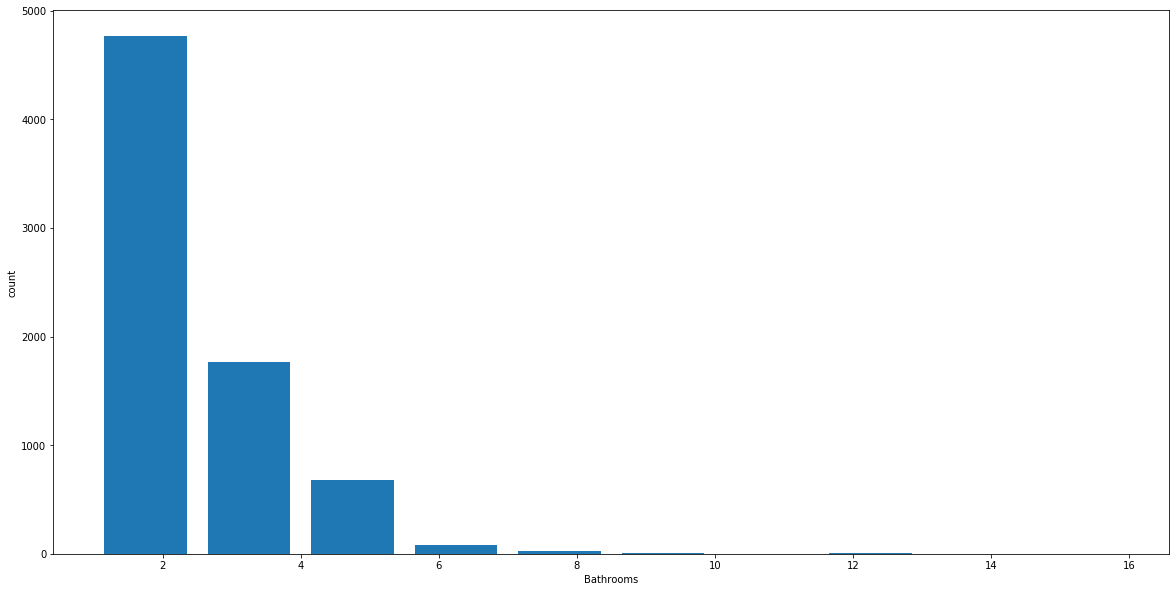

In [118]:
plt.hist(DF5.bath,rwidth = 0.8)
plt.xlabel("Bathrooms")
plt.ylabel("count")

In [119]:
DF6= DF5[DF5.bath<DF5.BHK+2]
DF6.shape

(7251, 7)

In [120]:
DF6.drop(["size","Price_per_sqft"],axis="columns",inplace = True)

E:\New folder\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
DF6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [122]:
Dummies=pd.get_dummies(DF6.location)

In [123]:
DF7 = pd.concat([DF6,Dummies.drop('other',axis="columns")],axis="columns")

In [124]:
DF7

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
DF7.drop('location',axis="columns",inplace = True)

In [126]:
DF7.shape

(7251, 245)

In [127]:
x = DF7.drop('price',axis="columns")
y = DF7.price

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8452277697874251

In [130]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(),x,y,cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0))

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [131]:
np.mean(cross_val_score(LinearRegression(),x,y,cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)))

0.8183540750696239

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def finding_best_model(x,y):
    algos = {
        'linear Regression' : {
            'model' : LinearRegression(),
            'params': {
            } 
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'Decision Tree Regressor' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        clf =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        clf.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

finding_best_model(x,y)

,model,best_score,best_params
0,linear Regression,0.818354,{}
1,lasso,0.687430,"{'alpha': 1, 'selection': 'random'}"
2,Decision Tree Regressor,0.722978,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [149]:
def price_predict(location,area,bath,bhk):
    X = np.zeros(len(x.columns))
    X[0] = area
    X[1] = bath
    X[2] = bhk
    if location !='other':
        X[np.where(x.columns == location)[0][0]] = 1
    return model.predict([X])[0]

In [150]:
price_predict('1st Block Jayanagar',2850,4,4)

355.52271518864427

In [151]:
x2 = np.zeros(len(x.columns))
x2[0] = 1709
x2[1] = 3
x2[2] = 3
model.predict([x2])[0]

141.50094275269953

In [152]:
price_predict('Indira Nagar',1000,3,3)

184.5843020203375

In [153]:
import pickle
with open("Banglore_home_prices_data.pickle","wb") as f:
    pickle.dump(model,f)

In [154]:
with open("Banglore_home_prices_data.pickle","rb") as f:
    mp = pickle.load(f)

In [155]:
x3 = np.zeros(len(x.columns))
x3[0] = 1000
x3[1] = 3
x3[2] = 3
mp.predict([x3])

array([85.19544264])

In [171]:
import json

In [174]:
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))